In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
screen = pd.read_excel("ScreenTime.xlsx")
screentime =pd.DataFrame(data = screen)
screentime = screentime.rename(columns = {'Average phone screen time (in minutes)' : 'ScreenTime' , 'Average number of times you unlock your phone in a day':'Unlock'})
screentime

,Age,Gender,Unlock,ScreenTime
0,18,Female,20,180.0
1,56,Female,8,180.0
2,21,Male,150,200.0
3,22,Male,400,360.0
4,48,Male,50,240.0
...,...,...,...,...
662,45,Female,27,211.0
663,45,Female,24,125.0
664,45,Female,23,150.0
665,45,Female,18,126.0


In [3]:
screentime.shape

(667, 4)

In [4]:
screentime.drop(screentime[screentime["Age"]<5].index,inplace=True)
screentime.drop(screentime[screentime["Age"]>80].index,inplace=True)

In [5]:
screentime.shape

(665, 4)

In [6]:
screentime['ScreenTime'].min()

0.5

In [7]:
screentime['ScreenTime'] = screentime['ScreenTime'].apply(lambda x: x*60 if x<=40 else x)
screentime.drop(screentime[screentime["ScreenTime"]>1440].index,inplace=True)

In [8]:
screentime['ScreenTime'].min()

30.0

In [9]:
screentime.shape

(635, 4)

In [10]:
screentime.drop(screentime[screentime["Gender"]== "Prefer not to say"].index,inplace=True)
screentime.drop(screentime[screentime["Gender"]== "Other"].index,inplace=True)

In [11]:
screentime.shape

(632, 4)

In [12]:
def new_age(x) :
    if x<18 :
        return "A"
    elif x<24 :
        return "B"
    elif x<60 :
        return "C"
    else :
        return "D"
screentime["New_Age"]= screentime['Age'].apply(new_age)
print(screentime)

     Age  Gender  Unlock  ScreenTime New_Age
0     18  Female      20       180.0       B
1     56  Female       8       180.0       C
2     21    Male     150       200.0       B
3     22    Male     400       360.0       B
4     48    Male      50       240.0       C
..   ...     ...     ...         ...     ...
662   45  Female      27       211.0       C
663   45  Female      24       125.0       C
664   45  Female      23       150.0       C
665   45  Female      18       126.0       C
666   45  Female      16       150.0       C

[632 rows x 5 columns]


In [13]:
screentimeVSage= screentime.groupby(['New_Age']).mean()
screentimeVSgender= screentime.groupby(['Gender']).mean()
print(screentimeVSage)
print(screentimeVSgender)

               Age     Unlock  ScreenTime
New_Age                                  
A        16.160000  69.280000  308.920000
B        19.821678  62.716783  360.611888
C        44.600791  40.948617  220.549407
D        70.833333  30.833333  222.944444
              Age     Unlock  ScreenTime
Gender                                  
Female  28.070833  36.708333  286.791667
Male    32.405612  64.382653  299.198980


Text(0, 0.5, 'Screentime')

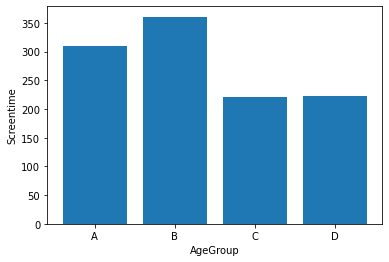

In [14]:
plt.bar(screentimeVSage.index,screentimeVSage["ScreenTime"])
plt.xlabel("AgeGroup")
plt.ylabel("Screentime")

Text(0, 0.5, 'Screentime')

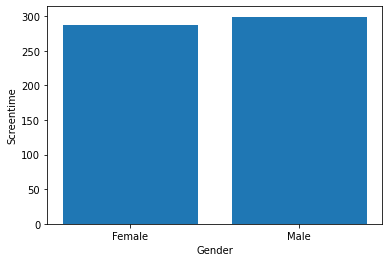

In [15]:
plt.bar(screentimeVSgender.index,screentimeVSgender["ScreenTime"])
plt.xlabel("Gender")
plt.ylabel("Screentime")

In [16]:
screentime = screentime.drop(['New_Age'], axis=1)
screentime

,Age,Gender,Unlock,ScreenTime
0,18,Female,20,180.0
1,56,Female,8,180.0
2,21,Male,150,200.0
3,22,Male,400,360.0
4,48,Male,50,240.0
...,...,...,...,...
662,45,Female,27,211.0
663,45,Female,24,125.0
664,45,Female,23,150.0
665,45,Female,18,126.0


In [17]:
def male(x) :
    if x=="Male" :
        return "1"
    else :
        return "0"
screentime["Male"]= screentime['Gender'].apply(male)
print(screentime)

     Age  Gender  Unlock  ScreenTime Male
0     18  Female      20       180.0    0
1     56  Female       8       180.0    0
2     21    Male     150       200.0    1
3     22    Male     400       360.0    1
4     48    Male      50       240.0    1
..   ...     ...     ...         ...  ...
662   45  Female      27       211.0    0
663   45  Female      24       125.0    0
664   45  Female      23       150.0    0
665   45  Female      18       126.0    0
666   45  Female      16       150.0    0

[632 rows x 5 columns]


In [18]:
def female(x) :
    if x=="Male" :
        return "0"
    else :
        return "1"
screentime["Female"]= screentime['Gender'].apply(female)
screentime = screentime.drop(['Gender'], axis=1)
screentime


,Age,Unlock,ScreenTime,Male,Female
0,18,20,180.0,0,1
1,56,8,180.0,0,1
2,21,150,200.0,1,0
3,22,400,360.0,1,0
4,48,50,240.0,1,0
...,...,...,...,...,...
662,45,27,211.0,0,1
663,45,24,125.0,0,1
664,45,23,150.0,0,1
665,45,18,126.0,0,1


In [19]:
screentime.to_excel('New_ScreenTime.xlsx')

In [27]:
screen = pd.read_excel("New_ScreenTime.xlsx")
screentime =pd.DataFrame(data = screen)
screentime = screentime.drop(['Unnamed: 0'], axis=1)
screentime

,Age,Unlock,Male,Female,ScreenTime
0,18,20,0,1,180
1,56,8,0,1,180
2,21,150,1,0,200
3,22,400,1,0,360
4,48,50,1,0,240
...,...,...,...,...,...
627,45,27,0,1,211
628,45,24,0,1,125
629,45,23,0,1,150
630,45,18,0,1,126


In [28]:
x=screentime.iloc[:,:-1].values
y=np.array(screentime.iloc[:,-1].values).reshape(-1,1)
print(x,y)

[[ 18  20   0   1]
 [ 56   8   0   1]
 [ 21 150   1   0]
 ...
 [ 45  23   0   1]
 [ 45  18   0   1]
 [ 45  16   0   1]] [[ 180]
 [ 180]
 [ 200]
 [ 360]
 [ 240]
 [ 240]
 [ 300]
 [ 180]
 [ 120]
 [ 150]
 [  90]
 [ 250]
 [  60]
 [ 180]
 [ 300]
 [ 120]
 [ 160]
 [ 330]
 [  90]
 [ 150]
 [ 250]
 [ 120]
 [ 120]
 [ 240]
 [ 480]
 [ 360]
 [ 600]
 [ 270]
 [ 120]
 [ 360]
 [1200]
 [ 240]
 [ 120]
 [  90]
 [ 360]
 [  90]
 [ 600]
 [  60]
 [  50]
 [ 120]
 [ 120]
 [ 450]
 [ 250]
 [ 420]
 [ 180]
 [  60]
 [ 250]
 [ 200]
 [ 200]
 [ 180]
 [ 300]
 [  60]
 [ 150]
 [  30]
 [ 360]
 [  90]
 [ 432]
 [  60]
 [ 600]
 [ 450]
 [ 250]
 [ 480]
 [ 480]
 [  75]
 [ 900]
 [  60]
 [ 150]
 [ 180]
 [ 360]
 [ 100]
 [ 100]
 [ 240]
 [ 360]
 [ 300]
 [ 400]
 [ 120]
 [ 300]
 [ 120]
 [ 180]
 [  90]
 [ 180]
 [ 240]
 [ 125]
 [ 300]
 [ 360]
 [ 400]
 [ 200]
 [ 300]
 [ 120]
 [ 480]
 [ 300]
 [ 200]
 [ 300]
 [ 200]
 [ 180]
 [ 120]
 [ 286]
 [ 180]
 [ 180]
 [ 360]
 [ 120]
 [ 150]
 [ 180]
 [ 180]
 [ 200]
 [ 540]
 [ 180]
 [  80]
 [  75]
 [ 120]


In [29]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y,train_size = 0.85)
print(xtrain)
print(ytrain)

[[ 19  50   0   1]
 [ 22 300   1   0]
 [ 50  75   1   0]
 ...
 [ 18  15   0   1]
 [ 48  10   0   1]
 [ 19  56   1   0]]
[[ 240]
 [ 300]
 [ 300]
 [  80]
 [ 180]
 [1440]
 [ 180]
 [ 200]
 [ 120]
 [ 240]
 [ 300]
 [  75]
 [ 180]
 [ 180]
 [ 600]
 [1200]
 [ 720]
 [ 240]
 [ 300]
 [ 319]
 [  60]
 [ 240]
 [ 226]
 [ 126]
 [ 120]
 [ 180]
 [ 480]
 [ 160]
 [ 900]
 [ 180]
 [ 422]
 [ 360]
 [ 300]
 [ 270]
 [ 500]
 [ 600]
 [ 240]
 [ 200]
 [ 330]
 [ 600]
 [ 480]
 [ 250]
 [ 300]
 [ 300]
 [ 780]
 [ 120]
 [ 360]
 [ 180]
 [ 540]
 [ 200]
 [ 600]
 [  67]
 [ 120]
 [ 150]
 [ 300]
 [ 120]
 [ 300]
 [ 816]
 [ 360]
 [ 120]
 [ 380]
 [ 266]
 [ 175]
 [  60]
 [ 360]
 [ 400]
 [ 330]
 [ 480]
 [ 120]
 [  50]
 [ 420]
 [ 330]
 [ 300]
 [ 350]
 [ 120]
 [ 150]
 [  60]
 [ 120]
 [ 200]
 [ 480]
 [ 534]
 [ 250]
 [ 480]
 [ 180]
 [ 160]
 [ 150]
 [ 150]
 [ 240]
 [ 200]
 [ 180]
 [ 360]
 [ 435]
 [ 600]
 [ 420]
 [ 450]
 [ 330]
 [ 180]
 [ 180]
 [ 180]
 [ 185]
 [ 600]
 [ 120]
 [  90]
 [ 120]
 [ 600]
 [ 286]
 [ 120]
 [ 240]
 [ 360]
 [ 850]


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

In [32]:
ypred = model.predict(xtest)
ytrainpred = model.predict(xtrain)

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r22 = r2_score(ytrain,ytrainpred)
r2 , r22

(0.08183981660494621, 0.08166099456057807)

In [34]:
screen = pd.read_excel("ScreenTime.xlsx")
screentime =pd.DataFrame(data = screen)
screentime = screentime.rename(columns = {'Average phone screen time (in minutes)' : 'ScreenTime' , 'Average number of times you unlock your phone in a day':'Unlock'})
screentime

,Age,Gender,Unlock,ScreenTime
0,18,Female,20,180.0
1,56,Female,8,180.0
2,21,Male,150,200.0
3,22,Male,400,360.0
4,48,Male,50,240.0
...,...,...,...,...
662,45,Female,27,211.0
663,45,Female,24,125.0
664,45,Female,23,150.0
665,45,Female,18,126.0


In [36]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
screentime['Gender']= label_encoder.fit_transform(screentime['Gender'])
screentime

,Age,Gender,Unlock,ScreenTime
0,18,0,20,180.0
1,56,0,8,180.0
2,21,1,150,200.0
3,22,1,400,360.0
4,48,1,50,240.0
...,...,...,...,...
662,45,0,27,211.0
663,45,0,24,125.0
664,45,0,23,150.0
665,45,0,18,126.0


In [38]:
screentime.drop(screentime[screentime["Age"]<5].index,inplace=True)
screentime.drop(screentime[screentime["Age"]>80].index,inplace=True)

In [39]:
screentime['ScreenTime'] = screentime['ScreenTime'].apply(lambda x: x*60 if x<=40 else x)
screentime.drop(screentime[screentime["ScreenTime"]>1440].index,inplace=True)

In [40]:
screentime.drop(screentime[screentime["Gender"]== "Prefer not to say"].index,inplace=True)
screentime.drop(screentime[screentime["Gender"]== "Other"].index,inplace=True)

In [41]:
screentime

,Age,Gender,Unlock,ScreenTime
0,18,0,20,180.0
1,56,0,8,180.0
2,21,1,150,200.0
3,22,1,400,360.0
4,48,1,50,240.0
...,...,...,...,...
662,45,0,27,211.0
663,45,0,24,125.0
664,45,0,23,150.0
665,45,0,18,126.0


In [42]:
screentime['ScreenTime']=screentime['ScreenTime'].astype("int")
screentime

,Age,Gender,Unlock,ScreenTime
0,18,0,20,180
1,56,0,8,180
2,21,1,150,200
3,22,1,400,360
4,48,1,50,240
...,...,...,...,...
662,45,0,27,211
663,45,0,24,125
664,45,0,23,150
665,45,0,18,126


In [43]:
x=screentime.iloc[:,:-1].values
y=np.array(screentime.iloc[:,-1].values).reshape(-1,1)
print(x,y)

[[ 18   0  20]
 [ 56   0   8]
 [ 21   1 150]
 ...
 [ 45   0  23]
 [ 45   0  18]
 [ 45   0  16]] [[ 180]
 [ 180]
 [ 200]
 [ 360]
 [ 240]
 [ 240]
 [ 300]
 [ 180]
 [ 120]
 [ 150]
 [  90]
 [ 250]
 [  60]
 [ 180]
 [ 300]
 [ 120]
 [ 160]
 [ 330]
 [  90]
 [ 150]
 [ 250]
 [ 120]
 [ 120]
 [ 240]
 [ 480]
 [ 360]
 [ 600]
 [ 270]
 [ 120]
 [ 360]
 [1200]
 [ 240]
 [ 120]
 [  90]
 [ 360]
 [  90]
 [ 600]
 [  60]
 [  50]
 [ 120]
 [ 120]
 [ 450]
 [ 250]
 [ 420]
 [ 180]
 [  60]
 [ 250]
 [ 200]
 [ 200]
 [ 180]
 [ 300]
 [  60]
 [ 150]
 [  30]
 [ 360]
 [  90]
 [ 432]
 [  60]
 [ 600]
 [ 450]
 [ 250]
 [ 480]
 [ 480]
 [  75]
 [ 900]
 [  60]
 [ 150]
 [ 180]
 [ 360]
 [ 100]
 [ 100]
 [ 240]
 [ 360]
 [ 300]
 [ 400]
 [ 120]
 [ 300]
 [ 120]
 [ 180]
 [  90]
 [ 180]
 [ 240]
 [ 125]
 [ 300]
 [ 360]
 [ 400]
 [  90]
 [ 200]
 [ 300]
 [ 120]
 [ 480]
 [ 300]
 [ 200]
 [ 300]
 [ 200]
 [ 180]
 [ 120]
 [ 286]
 [ 180]
 [ 180]
 [ 360]
 [ 120]
 [ 150]
 [ 180]
 [ 180]
 [ 200]
 [ 540]
 [ 180]
 [  80]
 [  75]
 [ 120]
 [  90]
 [ 480]


In [52]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y,train_size = 0.9)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [54]:
ypred = model.predict(xtest)
ytrainpred = model.predict(xtrain)

In [55]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r22 = r2_score(ytrain,ytrainpred)
r2 , r22

(0.09781585013150296, 0.09139997499431807)